# Solution 7.5.1 Venice Sea Level

Author: Marcel Steiner-Curtis \
Date: 21.08.2019 sml, 05.03.2021 sml: Python-Jupyter Notebook

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import scipy as scp

##   Solution 7.5.1 Venice Sea Level Data

read data

In [2]:
os.chdir('../04 Datasets')
data = pd.read_csv('venice.dat', sep='\t')
data.head()

,Year,SeaLevel
0,1931,103
1,1932,78
2,1933,121
3,1934,116
4,1935,115


# (a) Scatter Diagram: Sea Level versus Year

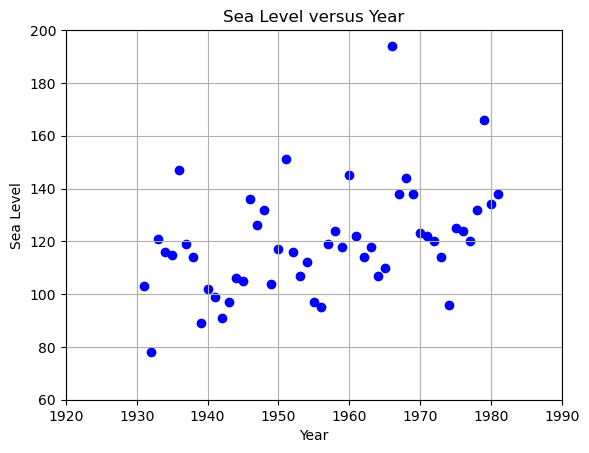

In [3]:
plt.close()
plt.xlim([1920,1990])
plt.ylim([60,200])
plt.scatter(data.Year, data.SeaLevel, color='blue')
plt.grid()            
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Sea Level versus Year')
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.show()

REMARK: The diagram indicates that there might be a weak relationship between the sea level and the year.
It seems that we can see in the data that Venice sinks.

# (b) Parameter Estimation

Estimation of the parameters (explicit formulae)

In [4]:
YearBar = np.mean(data.Year)
SeaLevelBar = np.mean(data.SeaLevel)
Sxx = sum((data.Year-YearBar)**2)
Sxy = sum((data.Year-YearBar)*(data.SeaLevel-SeaLevelBar))

slope

In [5]:
beta1 = Sxy/Sxx;   beta1

0.5669683257918552

intercept

In [6]:
beta0 = SeaLevelBar - beta1*YearBar;   beta0

-989.3822021116138

REMARK: The intercept is the sea level in the year 0, that is 2000 years ago. This shows clearly that the intercept in this
example has no physical meaning, since it is much too far away from the point cloud.

fitted values

In [7]:
SeaLevelHat = beta0 + beta1*data.Year

residuals

In [8]:
res = data.SeaLevel - SeaLevelHat
np.mean(res)

-7.802037882856002e-14

error sum of squares

In [9]:
sigma2Hat = sum(res**2)/(data.shape[0]-2)

residual standard error

In [10]:
np.sqrt(sigma2Hat)

18.6197724079446

### Estimation of the parameters (smf.ols)

In [11]:
mod = smf.ols(formula='SeaLevel ~ Year', data=data).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SeaLevel   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     10.25
Date:                Mon, 13 Feb 2023   Prob (F-statistic):            0.00241
Time:                        13:08:37   Log-Likelihood:                -220.48
No. Observations:                  51   AIC:                             445.0
Df Residuals:                      49   BIC:                             448.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -989.3822    346.477     -2.856      0.006   -1685.654    -293.111
Year           0.5670      0.177      3.201      0.002       0.211       0.923
==============================================================================
Omnibus:                       18.209   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.802
Skew:                           1.204   Prob(JB):                     2.50e-06
Kurtosis:                       5.519   Cond. No.                     2.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

residuals

In [12]:
mod.resid

0     -2.433635
1    -28.000603
2     14.432428
3      8.865460
4      7.298492
5     38.731523
6     10.164555
7      4.597587
8    -20.969382
9     -8.536350
10   -12.103318
11   -20.670287
12   -15.237255
13    -6.804223
14    -8.371192
15    22.061840
16    11.494872
17    16.927903
18   -11.639065
19     0.793967
20    34.226998
21    -1.339970
22   -10.906938
23    -6.473906
24   -22.040875
25   -24.607843
26    -1.174811
27     3.258220
28    -3.308748
29    23.124284
30    -0.442685
31    -9.009653
32    -5.576621
33   -17.143590
34   -14.710558
35    68.722474
36    12.155505
37    17.588537
38    11.021569
39    -4.545400
40    -6.112368
41    -8.679336
42   -15.246305
43   -33.813273
44    -5.380241
45    -6.947210
46   -11.514178
47    -0.081146
48    33.351885
49     0.784917
50     4.217949
dtype: float64

fitted values

In [13]:
mod.fittedvalues

0     105.433635
1     106.000603
2     106.567572
3     107.134540
4     107.701508
5     108.268477
6     108.835445
7     109.402413
8     109.969382
9     110.536350
10    111.103318
11    111.670287
12    112.237255
13    112.804223
14    113.371192
15    113.938160
16    114.505128
17    115.072097
18    115.639065
19    116.206033
20    116.773002
21    117.339970
22    117.906938
23    118.473906
24    119.040875
25    119.607843
26    120.174811
27    120.741780
28    121.308748
29    121.875716
30    122.442685
31    123.009653
32    123.576621
33    124.143590
34    124.710558
35    125.277526
36    125.844495
37    126.411463
38    126.978431
39    127.545400
40    128.112368
41    128.679336
42    129.246305
43    129.813273
44    130.380241
45    130.947210
46    131.514178
47    132.081146
48    132.648115
49    133.215083
50    133.782051
dtype: float64

degrees of freedom

In [14]:
dfree = mod.df_resid;   dfree

49.0

residual standard error

In [15]:
sigmaHat = np.sqrt(mod.scale);   sigmaHat

18.619772407944605

### (c) Scatter Diagram: Time versus Volume with the best Model

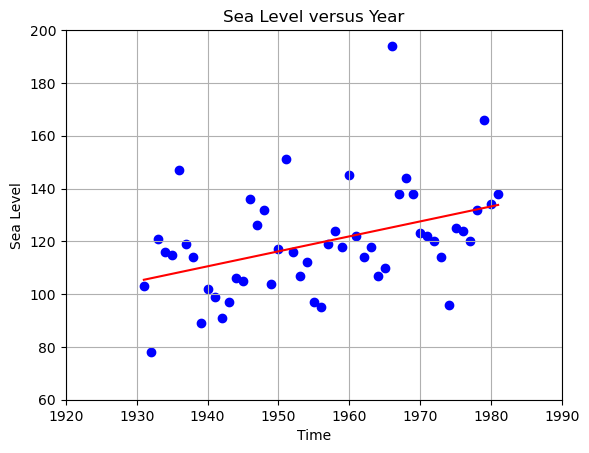

In [16]:
plt.close()
plt.xlim([1920,1990])
plt.ylim([60,200])
plt.scatter(data.Year, data.SeaLevel, color='blue')
plt.grid()            
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Sea Level versus Year')
plt.xlabel('Time')
plt.ylabel('Sea Level')
#   add best model
plt.plot(data.Year, mod.predict(), color='red')
plt.show()

REMARK: The best model indeed has a positive slope indicating that the data could support the hypothesis the Venice sinks.
On the other hand the points scatter a lot around the straight line.
We will have to test the hypothesis H0: slope=0

### (d) Testing Hypothesis

null hypothesis        H0: slope=0
alternative hypothesis H1: slope <> 0

In [17]:
beta10 = 0

estimator of slope

In [18]:
beta1Hat = mod.params.Year;   beta1Hat

0.5669683257918573

standard error ($S_{xx}$ from Ex. 7.2.1)

In [19]:
sebeta1 = np.sqrt(sigmaHat**2/Sxx);   sebeta1

0.17713045133310948

test statistic

In [20]:
Testbeta1 = (beta1Hat-beta10)/sebeta1;   Testbeta1

3.2008518102041257

critical value (two-sided)

In [21]:
alpha = 0.05

the degrees of freedom were defined in Ex. 7.2.1

In [22]:
tcrit = scp.stats.t.ppf(1-alpha/2, df=dfree);   tcrit

2.009575234489209

REMARK: Since abs(Test.beta1)=3.200852 > t.crit=2.009575 we reject the null hypothesis and conclude that the Sea level
depends significantly on the year.
In other words the data set supports the the hypothesis that Venice sinks.
The annual sinking rate is 0.5669683 cm/year.

total amount of sinking

In [23]:
(max(data.Year)-min(data.Year)) * beta1Hat

28.348416289592866

REMARK: In the years 1931-1981 Venice sank 28.34842 cm.

In [24]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SeaLevel   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     10.25
Date:                Mon, 13 Feb 2023   Prob (F-statistic):            0.00241
Time:                        13:08:37   Log-Likelihood:                -220.48
No. Observations:                  51   AIC:                             445.0
Df Residuals:                      49   BIC:                             448.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -989.3822    346.477     -2.856      0.006   -1685.654    -293.111
Year           0.5670      0.177      3.201      0.002       0.211       0.923
==============================================================================
Omnibus:                       18.209   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.802
Skew:                           1.204   Prob(JB):                     2.50e-06
Kurtosis:                       5.519   Cond. No.                     2.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""